# Colab setting


Mount google drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Module and path setting

Import modules

In [8]:
import numpy as np

np.random.seed(123)  # for reproducibility

from sklearn.preprocessing import LabelEncoder
from imutils import paths
import cv2
from time import time
from matplotlib import pyplot as plt
import os, os.path
from tqdm.auto import tqdm

import torch
import torch.nn as nn
import torch.utils.data as data_utils
import random as random
from torchsummary import summary

In [9]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

Set device (gpu or cpu)

In [10]:
torch.manual_seed(123)  # for reproducibility

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

plt.close("all")

Set data path

In [11]:
path_base = "/content/drive/MyDrive/drive/CMRI/Lab9/Data/recon_classification/"
recon1 = "ref"
recon2 = "tgv"

print("paths for training and validation image data")
path_base_training_recon1 = "{}{}{}".format(path_base, "train/", recon1, "/")
path_base_training_recon2 = "{}{}{}".format(path_base, "train/", recon2, "/")
path_base_validation_recon1 = "{}{}{}".format(path_base, "val/", recon1, "/")
path_base_validation_recon2 = "{}{}{}".format(path_base, "val/", recon2, "/")

trainingPaths = list(paths.list_images(path_base_training_recon1)) + list(paths.list_images(path_base_training_recon2))
validationPaths = list(paths.list_images(path_base_validation_recon1)) + list(paths.list_images(path_base_validation_recon2))

nTrainImages = len(trainingPaths)
nTestImages = len(validationPaths)

print(nTestImages, nTrainImages)

paths for training and validation image data
130 390


# Data

Load data

In [12]:
def augment(img, mirroring, rotation):
    # this function takes a single image as an input and performs a random transformation
    # (mirroring and/or rotation) on it and outputs the transformed image
    # augmentation done based mirror/rotation flags
    if mirroring:
        img = np.flip(img, random.randint(0, 1))  # randomly flip vertically/horizontally
    elif rotation:
        img = np.rot90(img, random.randint(0, 4))

    return img

In [15]:
# %% Load data
# initialize data matrix and labels list
x_train = []
y_train = []
x_val = []
y_val = []

# Training data
print(f"loading {nTrainImages} train images")
for (i, imagePath) in enumerate(trainingPaths):
    image = cv2.imread(imagePath)
    image = rgb2gray(image)
    [nR, nC] = image.shape
    image = image.reshape(nR, nC, 1)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    x_train.append(image)
    y_train.append(label)
    if i > 0 and i % 100 == 0:
        print(f"train images processed {i}/{nTrainImages}")

# Test data
print(f"loading {nTestImages} validation images")
for (i, imagePath) in enumerate(validationPaths):
    image = cv2.imread(imagePath)
    image = rgb2gray(image)
    [nR, nC] = image.shape
    image = image.reshape(nR, nC, 1)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    x_val.append(image)
    y_val.append(label)

    if i > 0 and i % 100 == 0:
        print(f"validation images processed {i}/{nTestImages}")

print(y_train)

loading 390 train images
train images processed 100/390
train images processed 200/390
train images processed 300/390
loading 130 validation images
validation images processed 100/130
['ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 'ref', 're

Augment training data

In [16]:
# %% Load data
# initialize data matrix and labels list
mirroring = True
rotation = True

# Training data
print(f"loading {nTrainImages} train images")
for (i, imagePath) in enumerate(trainingPaths[50:150]):
    img = cv2.imread(imagePath)
    img = rgb2gray(img)
    [nR, nC] = img.shape
    img = img.reshape(nR, nC, 1)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    x_train.append(augment(img, mirroring=mirroring, rotation=rotation))
    y_train.append(label)
    if i > 0 and i % 50 == 0:
        print(f"train images processed {i}/{nTrainImages}")


# Test data
print(f"loading {nTestImages} validation images")
for (i, imagePath) in enumerate(validationPaths[30:60]):
    image = cv2.imread(imagePath)
    image = rgb2gray(image)
    [nR, nC] = image.shape
    image = image.reshape(nR, nC, 1)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    x_val.append(augment(img, mirroring, rotation))
    y_val.append(label)

    if i > 0 and i % 10 == 0:
        print(f"validation images processed {i}/{nTestImages}")





loading 390 train images
train images processed 50/390
loading 130 validation images
validation images processed 10/130
validation images processed 20/130


490 490


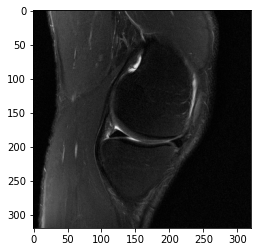

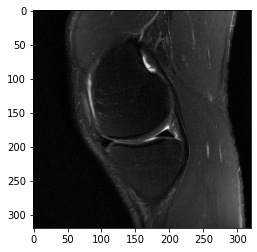

In [17]:
print(len(x_train), len(y_train))
x = x_train[-1]
x2 = x_train[149]
plt.imshow(x[:,:,0], cmap='gray')
plt.show()
plt.imshow(x2[:,:,0], cmap='gray')
plt.show()


Encode the labels, converting them from strings to integers


In [18]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.fit_transform(y_val)

Normalization (mean: 0, std: 1)

In [19]:
x_train = np.array(x_train)
x_val = np.array(x_val)

print("Normalizing images to mean 0 and std 1")
x_train -= x_train.mean(axis=(1,2,3))[...,None, None, None]
x_train /= x_train.std(axis=(1,2,3))[...,None, None, None]

x_val -= x_val.mean(axis=(1,2,3))[...,None, None, None]
x_val /= x_val.std(axis=(1,2,3))[...,None, None, None]

Normalizing images to mean 0 and std 1


In [20]:
nTrainImages = x_train.shape[0]
nTestImages = x_val.shape[0]
print(nTrainImages, nTestImages)

490 160


Reshape data 

In [21]:
x_train = x_train.reshape(nTrainImages, 1, nR, nC)
x_val = x_val.reshape(nTestImages, 1, nR, nC)

Generate torch variables

In [22]:
x_train = torch.Tensor(x_train).float().to(DEVICE)
y_train = torch.Tensor(y_train).long().to(DEVICE)

x_val = torch.Tensor(x_val).float().to(DEVICE)
y_val = torch.Tensor(y_val).long().to(DEVICE)

In [23]:
x_train.shape, y_train.shape

(torch.Size([490, 1, 320, 320]), torch.Size([490]))

# Network model
Model list:


1.   "CNN4layers_global_avg"
2.   "CNN1layers_global_avg"
3.   "CNN4layers_FC"


Defining a model class

In [24]:
class CNN4layers_global_avg(nn.Module):
  def __init__(self):
      super(CNN4layers_global_avg, self).__init__()

      self.conv1 = nn.Conv2d(1, 4, (3, 3), padding=(1,1))
      self.ReLU1 = nn.ReLU()
      self.pool1 = nn.MaxPool2d(2,2)

      self.conv2 = nn.Conv2d(4, 4, (3, 3), padding=(1,1))
      self.ReLU2 = nn.ReLU()
      self.pool2 = nn.MaxPool2d(2,2)

      self.conv3 = nn.Conv2d(4, 4, (3, 3), padding=(1,1))
      self.ReLU3 = nn.ReLU()
      self.pool3 = nn.MaxPool2d(2,2)

      self.conv4 = nn.Conv2d(4, 4, (3, 3), padding=(1,1))
      self.ReLU4 = nn.ReLU()
      self.pool4 = nn.MaxPool2d(2,2)

      self.out = nn.Linear(4, 2)

      self.LogSoftMax = nn.LogSoftmax(dim=1)

  def forward(self, x):
    x = self.ReLU1(self.conv1(x))
    x = self.pool1(x)

    x = self.ReLU2(self.conv2(x))
    x = self.pool2(x)

    x = self.ReLU3(self.conv3(x))
    x = self.pool3(x)

    x = self.ReLU4(self.conv4(x))
    x = self.pool4(x)

    x = x.mean([2, 3])

    x = self.LogSoftMax(self.out(x))

    return x

In [25]:
class CNN4layers_global_avg_batch_norm(nn.Module):
  def __init__(self):
      super(CNN4layers_global_avg_batch_norm, self).__init__()

      self.conv1 = nn.Conv2d(1, 4, (3, 3), padding=(1,1))
      self.batchnorm1 = nn.BatchNorm2d(4)
      self.ReLU1 = nn.ReLU()
      self.pool1 = nn.MaxPool2d(2,2)

      self.conv2 = nn.Conv2d(4, 4, (3, 3), padding=(1,1))
      self.batchnorm2 = nn.BatchNorm2d(4)
      self.ReLU2 = nn.ReLU()
      self.pool2 = nn.MaxPool2d(2,2)

      self.conv3 = nn.Conv2d(4, 4, (3, 3), padding=(1,1))
      self.batchnorm3 = nn.BatchNorm2d(4)
      self.ReLU3 = nn.ReLU()
      self.pool3 = nn.MaxPool2d(2,2)

      self.conv4 = nn.Conv2d(4, 4, (3, 3), padding=(1,1))
      self.batchnorm4 = nn.BatchNorm2d(4)
      self.ReLU4 = nn.ReLU()
      self.pool4 = nn.MaxPool2d(2,2)

      self.dropout = nn.Dropout(0.25)

      self.out = nn.Linear(4, 2)

      self.LogSoftMax = nn.LogSoftmax(dim=1)

  def forward(self, x):
    x = self.ReLU1(self.conv1(x))
    x = self.batchnorm1(x)
    x = self.pool1(x)

    x = self.ReLU2(self.conv2(x))
    x = self.batchnorm2(x)
    x = self.pool2(x)

    x = self.ReLU3(self.conv3(x))
    x = self.batchnorm3(x)
    x = self.pool3(x)

    x = self.ReLU4(self.conv4(x))
    x = self.batchnorm4(x)
    x = self.pool4(x)

    x = self.dropout(x)

    x = x.mean([2, 3])

    x = self.LogSoftMax(self.out(x))

    return x

In [26]:
class CNN1layers_global_avg(nn.Module):
  def __init__(self):
      super(CNN1layers_global_avg, self).__init__()

      self.conv1 = nn.Conv2d(1, 4, (3, 3), padding=(1,1))
      self.ReLU1 = nn.ReLU()
      self.pool1 = nn.MaxPool2d(2,2)

      self.out = nn.Linear(4, 2)

      self.LogSoftMax = nn.LogSoftmax(dim=1)

  def forward(self, x):
    x = self.ReLU1(self.conv1(x))
    x = self.pool1(x)

    x = x.mean([2, 3])

    x = self.LogSoftMax(self.out(x))

    return x

In [36]:
class CNN4layers_FC(nn.Module):
  def __init__(self):
      super(CNN4layers_FC, self).__init__()

      self.conv1 = nn.Conv2d(1, 4, (3, 3), padding=(1,1))
      self.ReLU1 = nn.ReLU()
      self.pool1 = nn.MaxPool2d(2,2)

      self.conv2 = nn.Conv2d(4, 4, (3, 3), padding=(1,1))
      self.ReLU2 = nn.ReLU()
      self.pool2 = nn.MaxPool2d(2,2)

      self.conv3 = nn.Conv2d(4, 4, (3, 3), padding=(1,1))
      self.ReLU3 = nn.ReLU()
      self.pool3 = nn.MaxPool2d(2,2)

      self.conv4 = nn.Conv2d(4, 4, (3, 3), padding=(1,1))
      self.ReLU4 = nn.ReLU()
      self.pool4 = nn.MaxPool2d(2,2)

      self.flatten = nn.Flatten()
      self.fc = nn.Linear(1600, 16)
      self.out = nn.Linear(16, 2)

      self.LogSoftMax = nn.LogSoftmax(dim=1)

  def forward(self, x):
    x = self.ReLU1(self.conv1(x))
    x = self.pool1(x)

    x = self.ReLU2(self.conv2(x))
    x = self.pool2(x)

    x = self.ReLU3(self.conv3(x))
    x = self.pool3(x)

    x = self.ReLU4(self.conv4(x))
    x = self.pool4(x)

    x = self.flatten(x)

    x = self.fc(x)

    x = self.LogSoftMax(self.out(x))

    return x

In [37]:
model_name = "CNN4layers_global_avg_batch_norm"
print(model_name)
if model_name == "CNN4layers_global_avg":
    model = CNN4layers_global_avg()
elif model_name == "CNN1layers_global_avg":
    model = CNN1layers_global_avg()
elif model_name == "CNN4layers_FC":
    model = CNN4layers_FC()
elif model_name == "CNN4layers_global_avg_batch_norm":
    model = CNN4layers_global_avg_batch_norm()
else:
    raise f"{model_name} does not defined!"
model = model.to(DEVICE)
summary(model, input_size=( 1, 320, 320), batch_size=10)

CNN4layers_global_avg_batch_norm
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [10, 4, 320, 320]              40
              ReLU-2          [10, 4, 320, 320]               0
       BatchNorm2d-3          [10, 4, 320, 320]               8
         MaxPool2d-4          [10, 4, 160, 160]               0
            Conv2d-5          [10, 4, 160, 160]             148
              ReLU-6          [10, 4, 160, 160]               0
       BatchNorm2d-7          [10, 4, 160, 160]               8
         MaxPool2d-8            [10, 4, 80, 80]               0
            Conv2d-9            [10, 4, 80, 80]             148
             ReLU-10            [10, 4, 80, 80]               0
      BatchNorm2d-11            [10, 4, 80, 80]               8
        MaxPool2d-12            [10, 4, 40, 40]               0
           Conv2d-13            [10, 4, 40, 40]             148
      

Define hyperparameters, loss function, and optimizer

In [38]:
training_epochs = 500
lr = 0.001
batch_size = 10

criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr=lr)

Dataloader

In [39]:
dataloader_train = data_utils.TensorDataset(x_train, y_train)
dataloader_train = data_utils.DataLoader(dataloader_train, batch_size=batch_size, shuffle=True)

In [237]:
len(dataloader_train)

49

# Train model

In [40]:
loss_train = np.zeros(training_epochs)
acc_train = np.zeros(training_epochs)
loss_val = np.zeros(training_epochs)
acc_val = np.zeros(training_epochs)

time0 = time()
with tqdm(total=training_epochs, unit='Epoch', leave=True) as pbar:
  for epoch in range(training_epochs):
      torch.cuda.empty_cache()   
      for local_batch, local_labels in dataloader_train:
          # training step
          out = model(local_batch)
          optimizer.zero_grad()
          loss = criterion(out, local_labels)
          loss.backward()
          optimizer.step()

          loss_train[epoch] = loss.item()
          [dummy, predicted] = torch.max(out.data, 1)
          acc_train[epoch] = (torch.sum(local_labels == predicted) / local_labels.size()[0]).item()

          # validation
      out_val = model(x_val)
      loss = criterion(out_val, y_val)
      loss_val[epoch] = loss.item()
      [dummy, predicted_val] = torch.max(out_val.data, 1)
      acc_val[epoch] = (torch.sum(y_val == predicted_val) / y_val.size()[0]).item()


      pbar.set_description(desc=f"Epoch {epoch: 3d}")
      pbar.set_postfix({"train loss": f"{loss_train[epoch]: .3f}",
                        "train acc": f"{acc_train[epoch]: .3f}",
                        "val loss": f"{loss_val[epoch]: .3f}",
                        "val acc": f"{acc_val[epoch]: .3f}"})
      pbar.update()

print(f"\nTraining Time (in minutes) = {(time() - time0) / 60}\n")

  0%|          | 0/500 [00:00<?, ?Epoch/s]


Training Time (in minutes) = 3.356376008192698



# Plot convergence

1. First check model on validation data

In [41]:
out_val = model(x_val.to(DEVICE))
[dummy, predicted_val] = torch.max(out_val.data, 1)
acc_val_final = (torch.sum(y_val.to(DEVICE) == predicted_val) / y_val.size()[0]).item()
print(f"Evaluation results of validation data :{acc_val_final:.2}")

Evaluation results of validation data :0.96


2. Check training data accuracy

In [42]:
out_train = model(x_train.to(DEVICE))
[dummy, predicted] = torch.max(out_train.data, 1)
acc_train_final = (torch.sum(y_train.to(DEVICE) == predicted) / y_train.size()[0]).item()
print(f"Evaluation results of train data :{acc_train_final}")

Evaluation results of train data :0.9775509834289551


3. check on test data

In [34]:
out_test = model(x_train.to(DEVICE))
[dummy, predicted] = torch.max(out.data, 1)
acc_train_final = (torch.sum(y_train.to(DEVICE) == predicted) / y_train.size()[0]).item()
print(f"Evaluation results of train data :{acc_train_final}")

RuntimeError: ignored

**Plot traing performance**

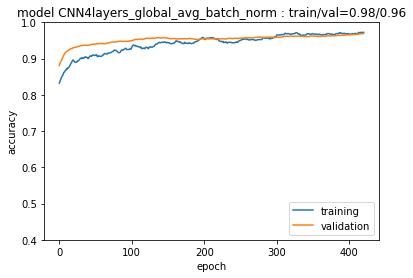

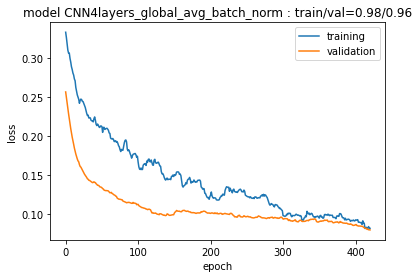

In [43]:
plot_train = f"model {model_name} : train/val={acc_train_final:.2}/{acc_val_final:.2}"

N1=80
N = 80
plt.figure()
plt.plot(np.convolve(acc_train, np.ones((N1,))/N1, mode='valid'))
plt.plot(np.convolve(acc_val, np.ones((N,))/N, mode='valid'))
plt.title(plot_train)
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['training', 'validation'], loc = 'lower right')
plt.ylim(0.4, 1.0)
plt.show()

plot_train = f"model {model_name} : train/val={acc_train_final:.2}/{acc_val_final:.2}"

N1=80
N = 80
plt.figure()
plt.plot(np.convolve(loss_train, np.ones((N1,))/N1, mode='valid'))
plt.plot(np.convolve(loss_val, np.ones((N,))/N, mode='valid'))
plt.title(plot_train)
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['training', 'validation'], loc = 'upper right')
#plt.ylim(0.4, 1.0)
plt.show()